In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [2]:
f1 = open(r'C:\Users\苗婧\Desktop\TULIP Academy\kagglebike\train.csv')
dailyData=pd.read_csv(f1)
#f2=open(r'C:\Users\苗婧\Desktop\TULIP Academy\kagglebike\test.csv')
#test=pd.read_csv(f2)

In [3]:
dailyData.shape

(10886, 12)

In [4]:
dailyData.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [5]:
dailyData.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
dailyData["date"] = dailyData.datetime.apply(lambda x : x.split()[0])
dailyData["hour"] = dailyData.datetime.apply(lambda x : x.split()[1].split(":")[0])
dailyData["weekday"] = dailyData.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
dailyData["month"] = dailyData.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
dailyData["season"] = dailyData.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dailyData["weather"] = dailyData.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [7]:
print(dailyData.weather)

0         Clear + Few clouds + Partly cloudy + Partly c...
1         Clear + Few clouds + Partly cloudy + Partly c...
2         Clear + Few clouds + Partly cloudy + Partly c...
3         Clear + Few clouds + Partly cloudy + Partly c...
4         Clear + Few clouds + Partly cloudy + Partly c...
                               ...                        
10881     Clear + Few clouds + Partly cloudy + Partly c...
10882     Clear + Few clouds + Partly cloudy + Partly c...
10883     Clear + Few clouds + Partly cloudy + Partly c...
10884     Clear + Few clouds + Partly cloudy + Partly c...
10885     Clear + Few clouds + Partly cloudy + Partly c...
Name: weather, Length: 10886, dtype: object


In [8]:
type(dailyData.weather)


pandas.core.series.Series

In [9]:
type(dailyData.date)

pandas.core.series.Series

In [10]:
type(dailyData.month)

pandas.core.series.Series

In [11]:
#类别变量列表
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    dailyData[var] = dailyData[var].astype("category")

In [12]:
#删除不必要的列
dailyData  = dailyData.drop(["datetime"],axis=1)

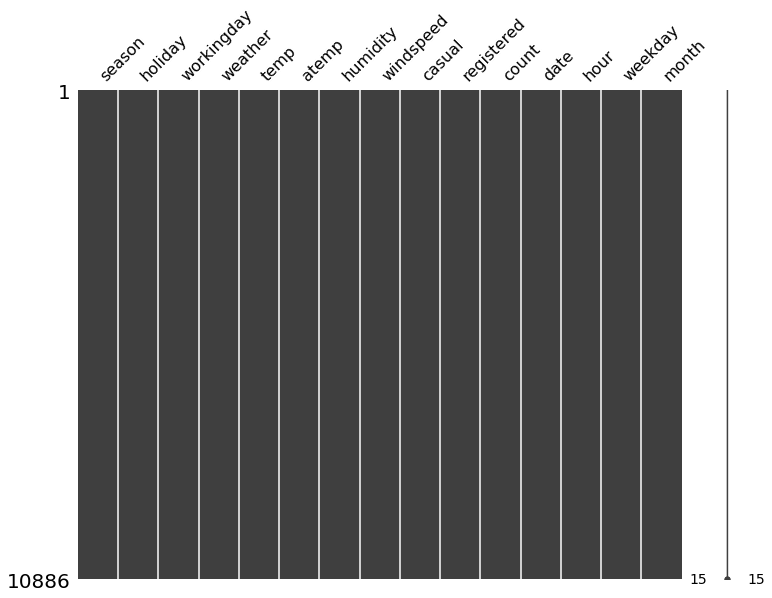

In [18]:
msno.matrix(dailyData,figsize=(12,9))
fig=plt.gcf()
fig.savefig("./axe.eps")
plt.show()

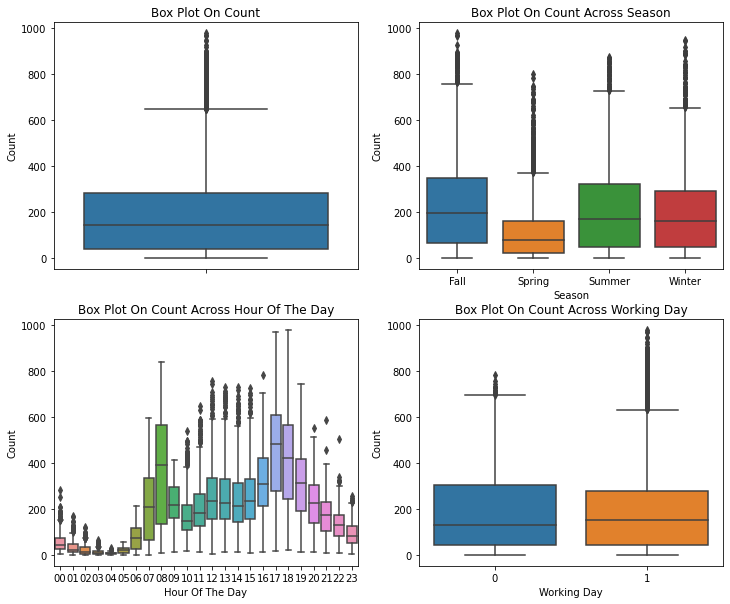

In [19]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=dailyData,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=dailyData,y="count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=dailyData,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=dailyData,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

fig=plt.gcf()
fig.savefig("./hour.eps")
plt.show()

In [20]:
#删除“计数”列中的异常值
dailyDataWithoutOutliers = dailyData[np.abs(dailyData["count"]-dailyData["count"].mean())<=(3*dailyData["count"].std())] 

In [21]:
print ("Shape Of The Before Ouliers: ",dailyData.shape)
print ("Shape Of The After Ouliers: ",dailyDataWithoutOutliers.shape)

Shape Of The Before Ouliers:  (10886, 15)
Shape Of The After Ouliers:  (10739, 15)


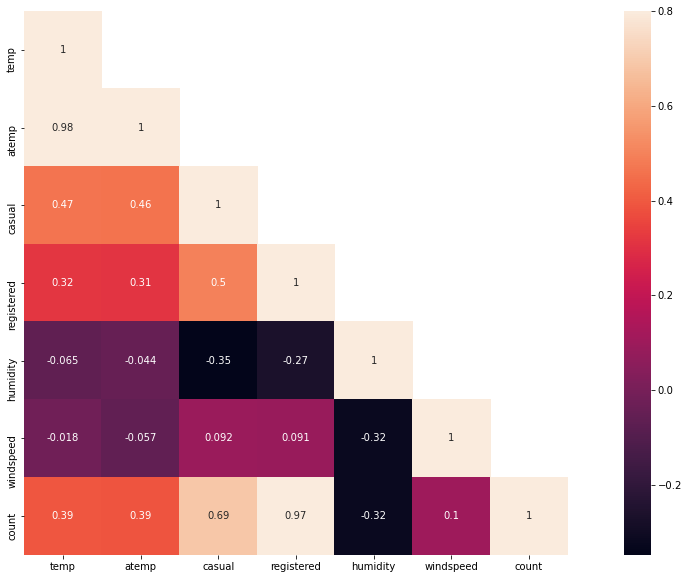

In [22]:
corrMatt = dailyData[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
fig=plt.gcf()
fig.savefig("./AxesSubplots.eps")
plt.show()

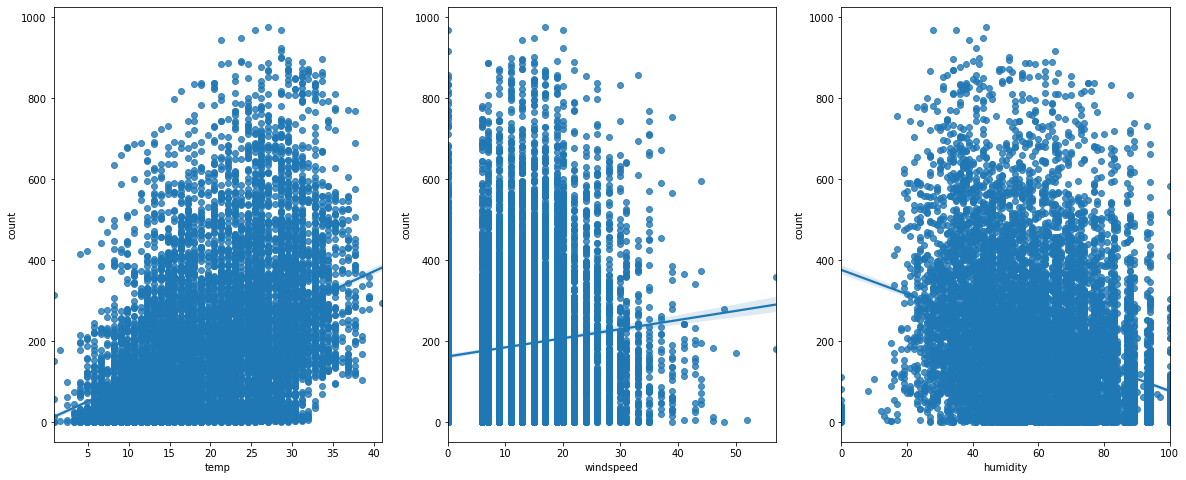

In [23]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20, 8)
sn.regplot(x="temp", y="count", data=dailyData,ax=ax1)
sn.regplot(x="windspeed", y="count", data=dailyData,ax=ax2)
sn.regplot(x="humidity", y="count", data=dailyData,ax=ax3)


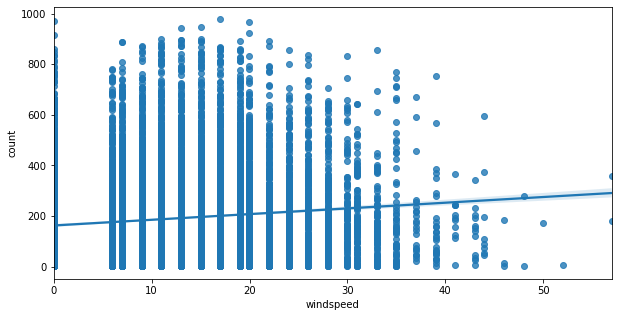

In [24]:
fig,(ax2) = plt.subplots(ncols=1)
fig.set_size_inches(10, 5)
sn.regplot(x="windspeed", y="count", data=dailyData,ax=ax2)

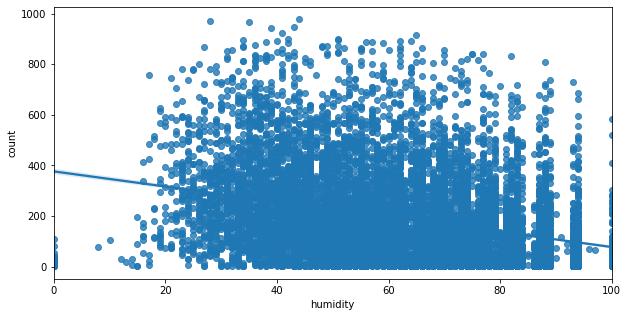

In [25]:
fig,(ax3) = plt.subplots(ncols=1)
fig.set_size_inches(10, 5)
sn.regplot(x="humidity", y="count", data=dailyData,ax=ax3)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


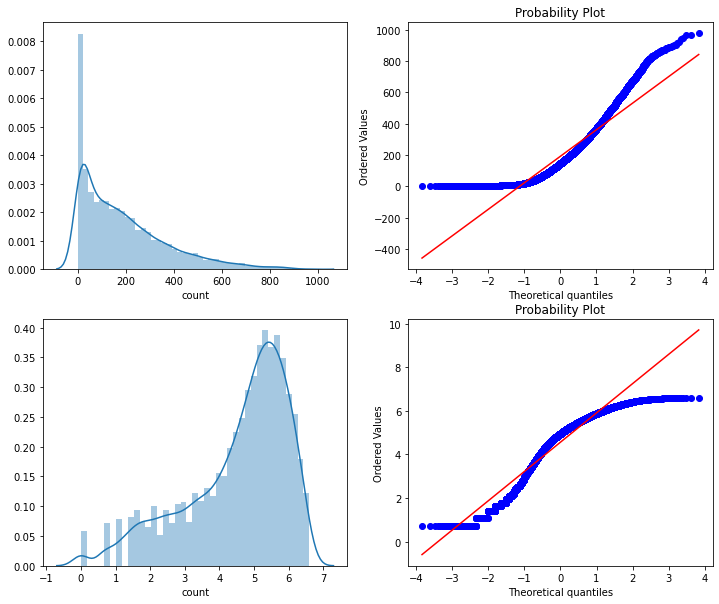

In [26]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sn.distplot(dailyData["count"],ax=axes[0][0])
stats.probplot(dailyData["count"], dist='norm', fit=True, plot=axes[0][1])
sn.distplot(np.log(dailyDataWithoutOutliers["count"]),ax=axes[1][0])
stats.probplot(np.log1p(dailyDataWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])
fig=plt.gcf()
fig.savefig("./keshihuafb.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


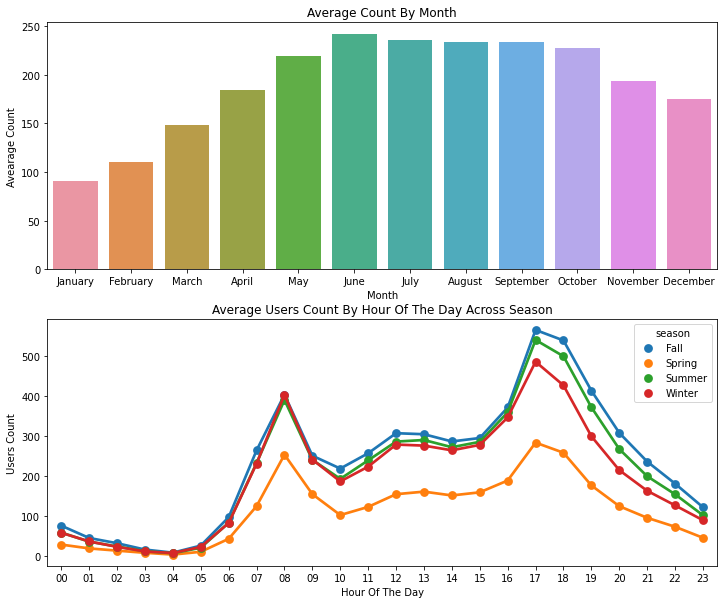

In [27]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(12,10)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(dailyData.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(dailyData.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

fig=plt.gcf()
fig.savefig("./keshihua1.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


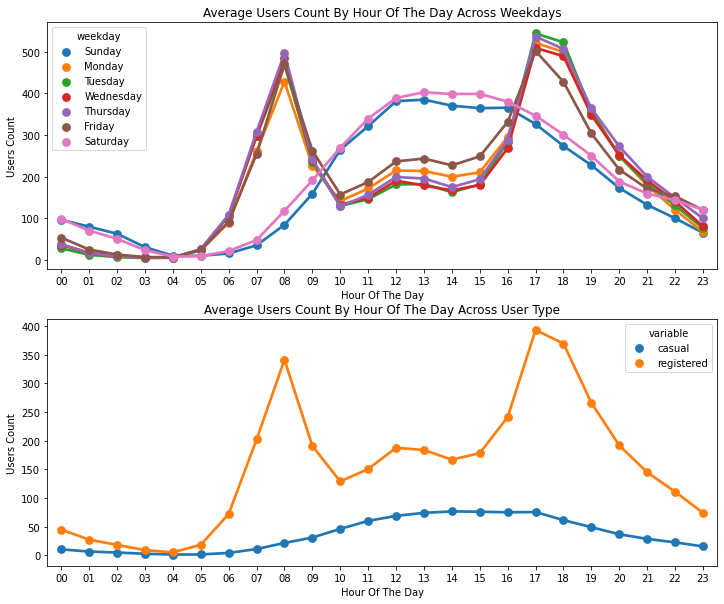

In [28]:
fig,(ax3,ax4)= plt.subplots(nrows=2)
fig.set_size_inches(12,10)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

hourAggregated = pd.DataFrame(dailyData.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(dailyData[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

fig=plt.gcf()
fig.savefig("./keshihua2.eps")
plt.show()

In [29]:
f1 = open(r'C:\Users\苗婧\Desktop\TULIP Academy\kagglebike\train.csv')
dataTrain=pd.read_csv(f1)
f2=open(r'C:\Users\苗婧\Desktop\TULIP Academy\kagglebike\test.csv')
dataTest=pd.read_csv(f2)

In [30]:
data = dataTrain.append(dataTest)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)
print(data)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
17374  2012-12-31 19:00:00       1        0           1        2  10.66   
17375  2012-12-31 20:00:00       1        0           1        2  10.66   
17376  2012-12-31 21:00:00       1        0           1        1  10.66   
17377  2012-12-31 22:00:00       1        0           1        1  10.66   
17378  2012-12-31 23:00:00       1        0           1        1  10.66   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

In [31]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)
print(data.month)

0         1
1         1
2         1
3         1
4         1
         ..
17374    12
17375    12
17376    12
17377    12
17378    12
Name: month, Length: 17379, dtype: int64


In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])
wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [34]:
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered"]

In [35]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

In [36]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = dataTest["datetime"]
yLabels = dataTrain["count"]
yLablesRegistered = dataTrain["registered"]
yLablesCasual = dataTrain["casual"]

In [37]:
print(dataTrain)

                  datetime season holiday workingday weather   temp   atemp  \
15199  2011-01-01 00:00:00      1       0          0       1   9.84  14.395   
15200  2011-01-01 01:00:00      1       0          0       1   9.02  13.635   
15201  2011-01-01 02:00:00      1       0          0       1   9.02  13.635   
15202  2011-01-01 03:00:00      1       0          0       1   9.84  14.395   
15203  2011-01-01 04:00:00      1       0          0       1   9.84  14.395   
...                    ...    ...     ...        ...     ...    ...     ...   
9568   2012-12-19 19:00:00      4       0          1       1  15.58  19.695   
9569   2012-12-19 20:00:00      4       0          1       1  14.76  17.425   
9570   2012-12-19 21:00:00      4       0          1       1  13.94  15.910   
9571   2012-12-19 22:00:00      4       0          1       1  13.94  17.425   
9572   2012-12-19 23:00:00      4       0          1       1  13.12  16.665   

       humidity  windspeed  casual  registered  cou

In [38]:
print(dataTest)

                  datetime season holiday workingday weather   temp   atemp  \
9573   2011-01-20 00:00:00      1       0          1       1  10.66  11.365   
16512  2011-01-20 01:00:00      1       0          1       1  10.66  13.635   
16513  2011-01-20 02:00:00      1       0          1       1  10.66  13.635   
9574   2011-01-20 03:00:00      1       0          1       1  10.66  12.880   
9575   2011-01-20 04:00:00      1       0          1       1  10.66  12.880   
...                    ...    ...     ...        ...     ...    ...     ...   
15194  2012-12-31 19:00:00      1       0          1       2  10.66  12.880   
15195  2012-12-31 20:00:00      1       0          1       2  10.66  12.880   
15196  2012-12-31 21:00:00      1       0          1       1  10.66  12.880   
15197  2012-12-31 22:00:00      1       0          1       1  10.66  13.635   
15198  2012-12-31 23:00:00      1       0          1       1  10.66  13.635   

       humidity  windspeed  casual  registered  cou

In [39]:
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

In [40]:
print(dataTest)

      season holiday workingday weather   temp   atemp  humidity  windspeed  \
9573       1       0          1       1  10.66  11.365        56  26.002700   
16512      1       0          1       1  10.66  13.635        56   8.846216   
16513      1       0          1       1  10.66  13.635        56   8.846216   
9574       1       0          1       1  10.66  12.880        56  11.001400   
9575       1       0          1       1  10.66  12.880        56  11.001400   
...      ...     ...        ...     ...    ...     ...       ...        ...   
15194      1       0          1       2  10.66  12.880        60  11.001400   
15195      1       0          1       2  10.66  12.880        60  11.001400   
15196      1       0          1       1  10.66  12.880        60  11.001400   
15197      1       0          1       1  10.66  13.635        56   8.998100   
15198      1       0          1       1  10.66  13.635        65   8.998100   

      hour  year weekday month  
9573     0  2011  

In [41]:
print(dataTrain)

      season holiday workingday weather   temp   atemp  humidity  windspeed  \
15199      1       0          0       1   9.84  14.395        81   7.302025   
15200      1       0          0       1   9.02  13.635        80   6.909526   
15201      1       0          0       1   9.02  13.635        80   6.909526   
15202      1       0          0       1   9.84  14.395        75   7.026358   
15203      1       0          0       1   9.84  14.395        75   7.026358   
...      ...     ...        ...     ...    ...     ...       ...        ...   
9568       4       0          1       1  15.58  19.695        50  26.002700   
9569       4       0          1       1  14.76  17.425        57  15.001300   
9570       4       0          1       1  13.94  15.910        61  15.001300   
9571       4       0          1       1  13.94  17.425        61   6.003200   
9572       4       0          1       1  13.12  16.665        66   8.998100   

      hour  year weekday month  
15199    0  2011  

In [42]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [43]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain,y = yLabelsLog)

# Make predictions
preds = lModel.predict(X= dataTrain)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Linear Regression:  0.9779721629923448


{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9779721479193477


AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

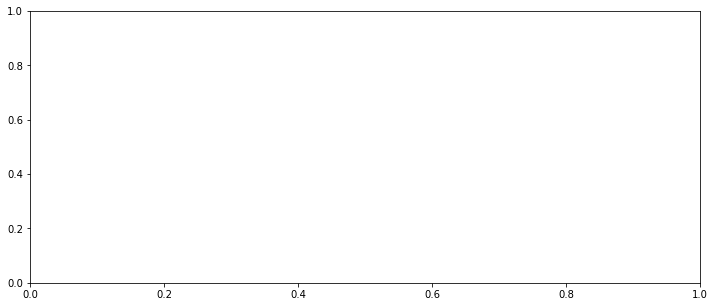

In [49]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_search = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit( dataTrain, yLabelsLog )
preds = grid_ridge_m.predict(X= dataTrain)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_search.cv_results_['mean_test_score'])
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)
sn.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

{'alpha': 0.005, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9781091840973668


AttributeError: 'GridSearchCV' object has no attribute 'grid_search'

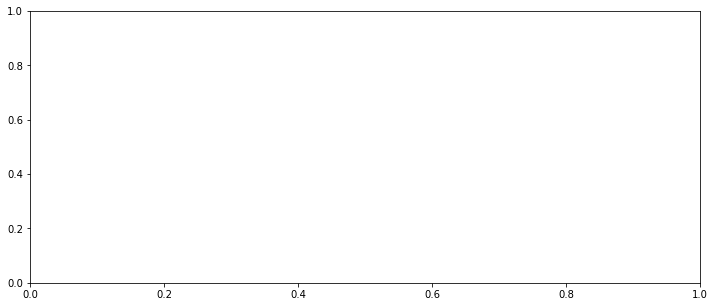

In [47]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit( dataTrain, yLabelsLog )
preds = grid_lasso_m.predict(X= dataTrain)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)
sn.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
yLabelsLog = np.log1p(yLabels)
rfModel.fit(dataTrain,yLabelsLog)
preds = rfModel.predict(X= dataTrain)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Random Forest:  0.10328075120901334


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01); ### Test 0.41
yLabelsLog = np.log1p(yLabels)
gbm.fit(dataTrain,yLabelsLog)
preds = gbm.predict(X= dataTrain)
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Gradient Boost:  0.18890947756754894


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

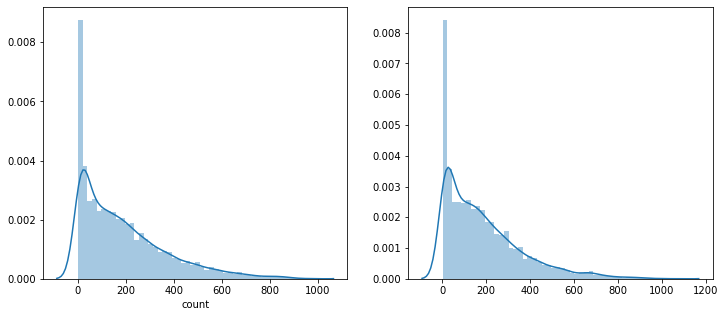

In [53]:
predsTest = gbm.predict(X= dataTest)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sn.distplot(yLabels,ax=ax1,bins=50)
sn.distplot(np.exp(predsTest),ax=ax2,bins=50)
fig=plt.gcf()
fig.savefig("./end.eps")
plt.show()

In [55]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(predsTest)]
    })
submission.to_csv('bike_predictions_gbm_separate_without_fe.csv', index=False)